In [1]:
from fastai import *
from fastai.vision import *

In [2]:
path = Path('/home/kushaj/Desktop/Github/final_techgig/Data/CNNPart_EXT/')
path_img = path/'PATCHES'
path_lbl = path/'all.txt'
path.ls()

[PosixPath('/home/kushaj/Desktop/Github/final_techgig/Data/CNNPart_EXT/PATCHES'),
 PosixPath('/home/kushaj/Desktop/Github/final_techgig/Data/CNNPart_EXT/all.txt')]

In [3]:
# Load label file
df = pd.read_csv(path_lbl, sep=' ', header=None)
print(df.shape)
df.head()

(144965, 2)


,0,1
0,RAINY/2016-02-12/camera7/R_2016-02-12_12.25_C0...,1
1,SUNNY/2016-01-15/camera7/S_2016-01-15_09.41_C0...,1
2,OVERCAST/2015-12-03/camera1/O_2015-12-03_16.41...,1
3,OVERCAST/2015-12-19/camera1/O_2015-12-19_13.18...,0
4,SUNNY/2016-01-18/camera6/S_2016-01-18_11.40_C0...,1


In [4]:
data = (ImageList.from_df(df, path_img)
                 .split_by_rand_pct()
                 .label_from_df()
                 .transform(get_transforms(), size=(150, 150))
                 .databunch(bs=64, val_bs=64, num_workers=8)
                 .normalize(imagenet_stats))

In [ ]:
learn = cnn_learner(data, models.resnet50)

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, max_lr=5e-2)

In [ ]:
path_store = Path('/home/kushaj/Desktop/Github/final_techgig/Temp/')
learn.save(path_store/'first_stage')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, max_lr=8e-5)

In [ ]:
learn.save(path_store/'second_stage')

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(3, max_lr=1e-6)

In [ ]:
learn.save(path_store/'final')

## Test the model imports

In [ ]:
path_model = Path('/home/kushaj/Desktop/Github/final_techgig/src/classifier/')
learn = cnn_learner(data, models.resnet50, pretrained=False)
learn.load(path_model/'final')

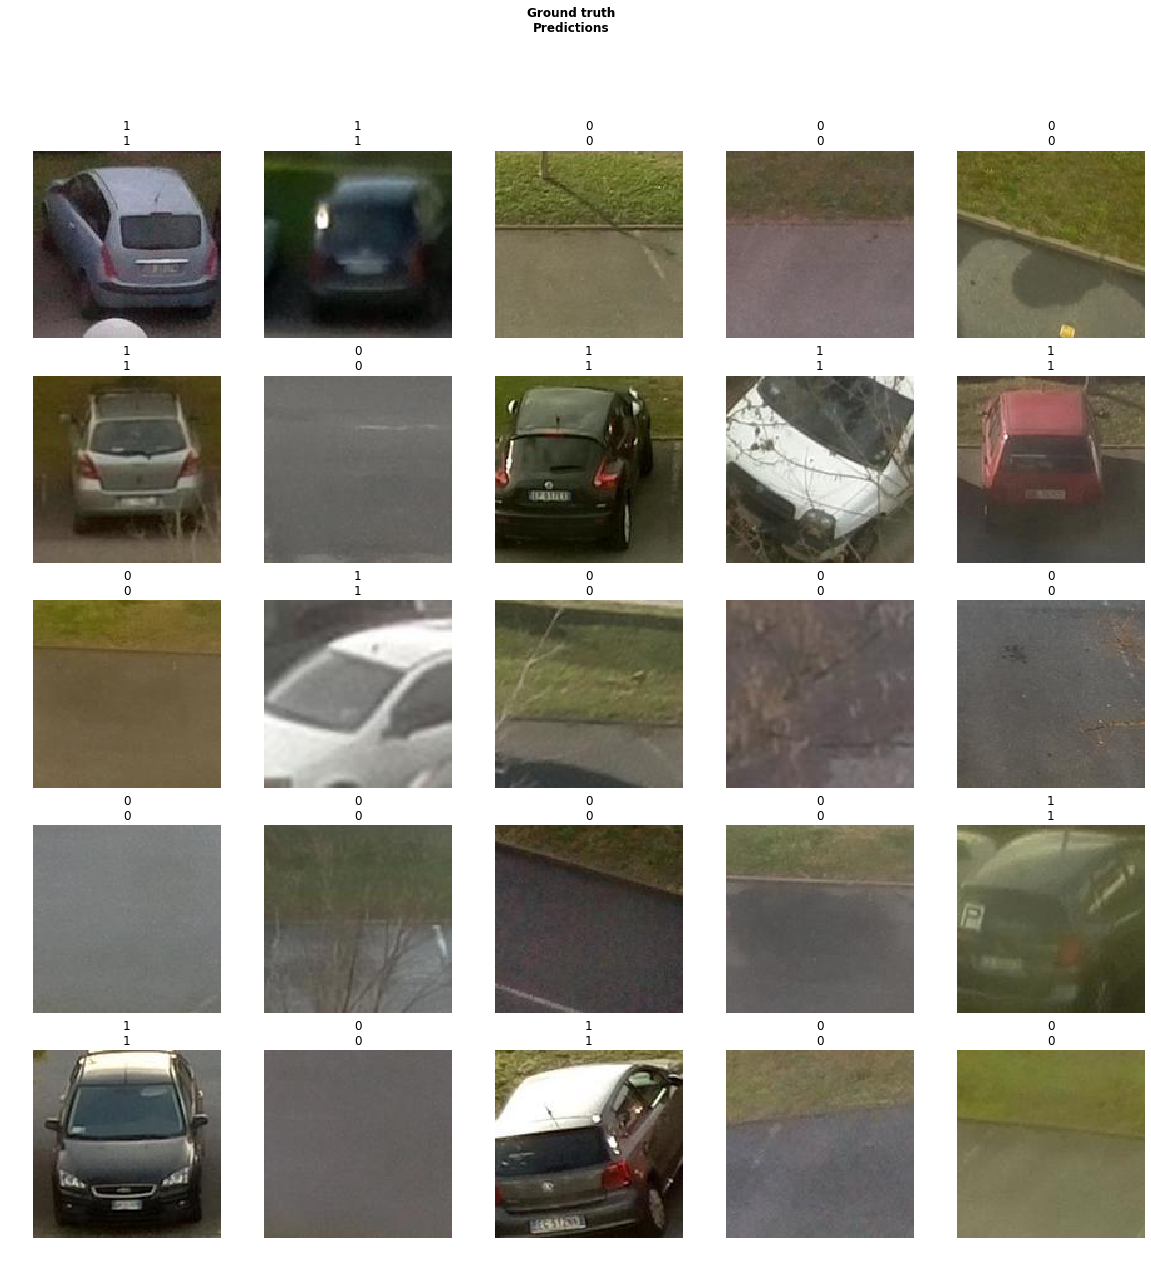

In [6]:
learn.show_results(DatasetType.Valid)

## Convert to PyTorch model

In [8]:
model = learn.model
model = model.to(torch.device('cpu'))
torch.save(model.state_dict(), 'classifier.pth')